<a href="https://colab.research.google.com/github/144fl/Mesin-Learning-1/blob/main/Tugas%2011/Muhammad_Afif_Fadhlurrahman_1103210161_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Afif Fadhlurrahman

NIM : 1103210161

Tugas : Tugas Week 11 LeNet

Dokumentasi Chat GPT:https://chatgpt.com/share/e274f135-ff4c-4533-a2c5-fc0435b63218

Import Libary

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

Modeling

In [3]:
# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Menormalisasi gambar
train_images = train_images / 255.0
test_images = test_images / 255.0

# Menambahkan satu channel untuk greyscale (1 channel)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Mendefinisikan model LeNet
def create_lenet_model():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Membuat model
model = create_lenet_model()

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2080 - accuracy: 0.9363 - val_loss: 0.0785 - val_accuracy: 0.9754
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0764 - accuracy: 0.9766 - val_loss: 0.0550 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0468 - val_accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0451 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0320 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0268 - accuracy: 0.9910 - val_loss: 0.0346 -

Evaluasi Model

In [4]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.0363 - accuracy: 0.9899 - 1s/epoch - 5ms/step

Test accuracy: 0.9898999929428101


Visualisasi

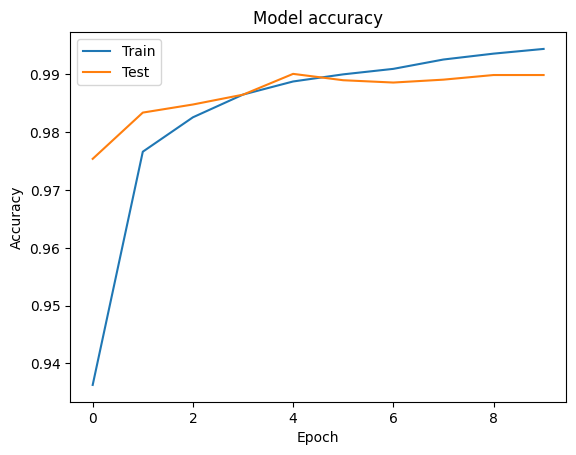

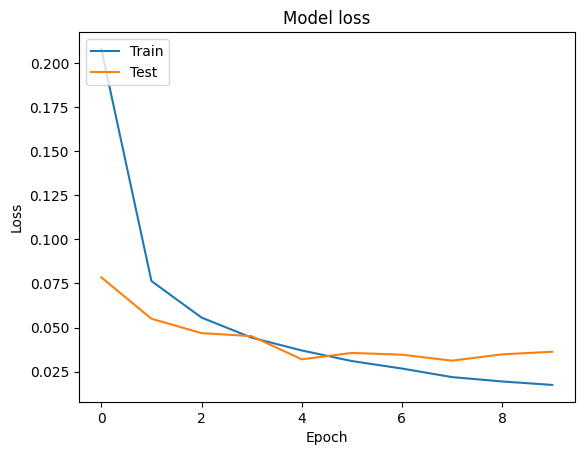

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()